In [32]:
# Nhập các thư viện cần thiết để xử lý dữ liệu
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Nhập bảng số từ dữ liệu đề cho
my_dict = {
    'deg': [-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0],
    'CL': [-0.38, -0.28, -0.18, -0.07, 0.04, 
            0.14, 0.24, 0.35, 0.46, 0.56, 
            0.65, 0.76, 0.87, 0.97, 1.07, 
            1.16, 1.26, 1.35, 1.44],
    'CD': [0.0077, 0.0071, 0.0066, 0.0063, 0.006, 
           0.0059, 0.0058, 0.0058, 0.006, 0.0062, 
           0.0066, 0.007, 0.0075, 0.0081, 0.0088, 
           0.0096, 0.0105, 0.0115, 0.0126],
    'CM(c/4)': [-0.0446, -0.044, -0.0434, -0.0428, -0.0422,
                -0.0416, -0.041, -0.0404, -0.0398, -0.0392,
                -0.0386, -0.038, -0.0374, -0.0368, -0.0362,
                -0.0356, -0.035, -0.0344, -0.0338]
}
data = pd.DataFrame(my_dict)

# Thực hiện tính CN và CA
cos = np.vectorize(math.cos)
sin = np.vectorize(math.sin)
data['rad'] = data['deg'] * (math.pi / 180)    # Tính giá trị góc theo radian
data['CN'] = cos(data['rad'])*data['CL'] + sin(data['rad'])*data['CD']    # Tính CN
data['CA'] = -sin(data['rad'])*data['CL'] + cos(data['rad'])*data['CD']    # Tính CA
data.drop(columns='rad', inplace=True)    # Loại bỏ cột radian

# Hiển thị bảng số liệu
display(data)

,deg,CL,CD,CM(c/4),CN,CA
0,-6.0,-0.38,0.0077,-0.0446,-0.378723,-0.032063
1,-5.0,-0.28,0.0071,-0.0440,-0.279553,-0.017331
2,-4.0,-0.18,0.0066,-0.0434,-0.180022,-0.005972
3,-3.0,-0.07,0.0063,-0.0428,-0.070234,0.002628
4,-2.0,0.04,0.0060,-0.0422,0.039766,0.007392
5,-1.0,0.14,0.0059,-0.0416,0.139876,0.008342
6,0.0,0.24,0.0058,-0.0410,0.240000,0.005800
7,1.0,0.35,0.0058,-0.0404,0.350048,-0.000309
8,2.0,0.46,0.0060,-0.0398,0.459929,-0.010057
9,3.0,0.56,0.0062,-0.0392,0.559557,-0.023117


Text(0.5, 1.0, 'CD & CA as a function of angle of attack')

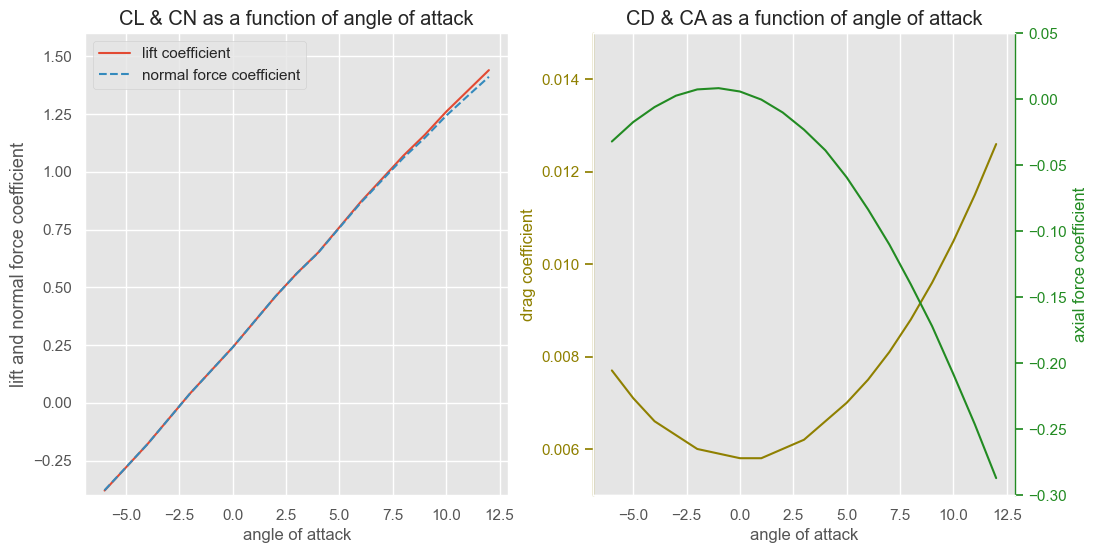

In [34]:
# Thực hiện biểu diễn bằng đồ thị
sns.set_theme(palette='hls')
plt.style.use('ggplot')

fig, (al, ad) = plt.subplots(1, 2, gridspec_kw={'wspace':0.2, 'hspace':0.2}, figsize=(12, 6), sharey=False)

# Biển diễn CL và CN
al.set_ylim(-0.4, 1.6)
al.set_ylabel('lift and normal force coefficient', fontdict={'size': 13})
data.plot(x='deg', y='CL', kind='line', ax=al, label='lift coefficient')
data.plot(x='deg', y='CN', kind='line', ax=al, label='normal force coefficient', style='--')
al.set_xlabel('angle of attack')
al.set_title('CL & CN as a function of angle of attack')

# Biểu diễn CD và CA
aa = ad.twinx()
data.plot(x='deg', y='CD', kind='line', ax=ad, color='#8F8000', ylim=(0.005, 0.015), grid=False, legend=False)
data.plot(x='deg', y='CA', kind='line', ax=aa, color='#228B22', ylim=(-0.3, 0.05), grid=False, legend=False)
ad.grid(True, axis='x')
ad.set_ylabel('drag coefficient', color='#8F8000')
aa.set_ylabel('axial force coefficient', color='#228B22')
ad.set_xlabel('angle of attack')
ad.spines['left'].set_color('#8F8000')
aa.spines['right'].set_color('#228B22')
ad.tick_params(axis="y", colors="#8F8000")
aa.tick_params(axis="y", colors="#228B22")
ad.set_title('CD & CA as a function of angle of attack')


,deg,Xcp,Xac
0,-6.0,0.132236,NaN
1,-5.0,0.092606,0.243950
2,-4.0,0.008918,0.243972
3,-3.0,-0.359393,0.244535
4,-2.0,1.311202,0.244545
5,-1.0,0.547407,0.244007
6,0.0,0.420833,0.244007
7,1.0,0.365413,0.244548
8,2.0,0.336535,0.244540
9,3.0,0.320055,0.243978


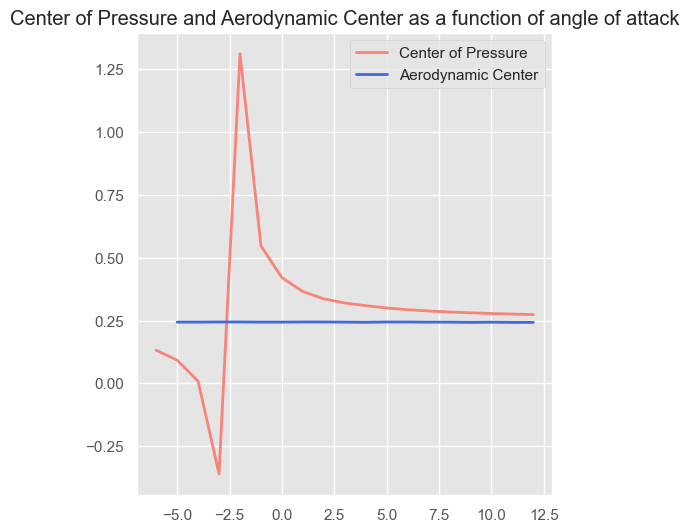

In [35]:
# Tạo bảng chứa giá trị tâm áp suất và tâm khí động
center1 = pd.DataFrame()
center1['deg'] = data['deg']
center1['Xcp'] = 0.25 - (data['CM(c/4)']) / (data['CN'])    # Tâm áp suất
center1['Xac'] = 0.25 - (data['CM(c/4)'].diff()) / (data['CN'].diff())    # Tâm khí động

display(center1)    # Hiển thị bảng chứa số liệu

fig, ax = plt.subplots(figsize=(12, 6), sharey=True)
ax.plot('deg', 'Xcp', data=center1, color='#F88379', label='Center of Pressure', linewidth=2)    # Đường tâm áp suất
ax.plot('deg', 'Xac', data=center1, color='#4169E1', label='Aerodynamic Center', linewidth=2)    # Đường tâm khí động
ax.set(title='Center of Pressure and Aerodynamic Center as a function of angle of attack', aspect=12)
ax.legend()

In [36]:
# Với NACA 2412
naca = pd.DataFrame()
naca['deg'] = range(-6, 13)    # Cột chứa góc tấn
naca['rad'] = naca['deg'] * (math.pi / 180)    # Thêm cột chứa góc tấn ở đơn vị radian
naca['CL'] = 2 * math.pi * (naca['rad'] + 0.03625)    # Giá trị CL
naca['CM(LE)'] = - 0.5 * math.pi * (naca['rad'] + 0.07007)    # Giá trị CM(LE)
CM25 = 0.25 * naca.iloc[6, 2] + naca.iloc[6, 3]    # Giá trị CM(c/4)
naca['CN'] = 4 * (CM25 - naca['CM(LE)'])    # Giá trị CN
cos = np.vectorize(math.cos)
sin = np.vectorize(math.sin)
naca['CA'] = (naca['CN'] * cos(naca['rad']) - naca['CL']) / sin(naca['rad'])    # Giá trị CA
naca.loc[6, 'CA'] = (naca.loc[7, 'CA'] + naca.loc[5, 'CA']) / 2
naca['CD'] = naca['CA'] * cos(naca['rad']) + naca['CN'] * sin(naca['rad'])    # # Giá trị CD
naca.drop(columns='rad', inplace=True)
display(naca) # Hiển thị bảng số liệu

,deg,CL,CM(LE),CN,CA,CD
0,-6,-0.430208,0.054428,-0.430208,-0.022546,0.022546
1,-5,-0.320546,0.027012,-0.320546,-0.013995,0.013995
2,-4,-0.210884,-0.000403,-0.210884,-0.007364,0.007364
3,-3,-0.101221,-0.027819,-0.101221,-0.002651,0.002651
4,-2,0.008441,-0.055235,0.008441,0.000147,-0.000147
5,-1,0.118103,-0.082650,0.118103,0.001031,-0.001031
6,0,0.227765,-0.110066,0.227765,-0.000957,-0.000957
7,1,0.337428,-0.137481,0.337428,-0.002945,0.002945
8,2,0.447090,-0.164897,0.447090,-0.007804,0.007804
9,3,0.556752,-0.192312,0.556752,-0.014579,0.014579


Text(0.5, 1.0, 'CD & CA as a function of angle of attack')

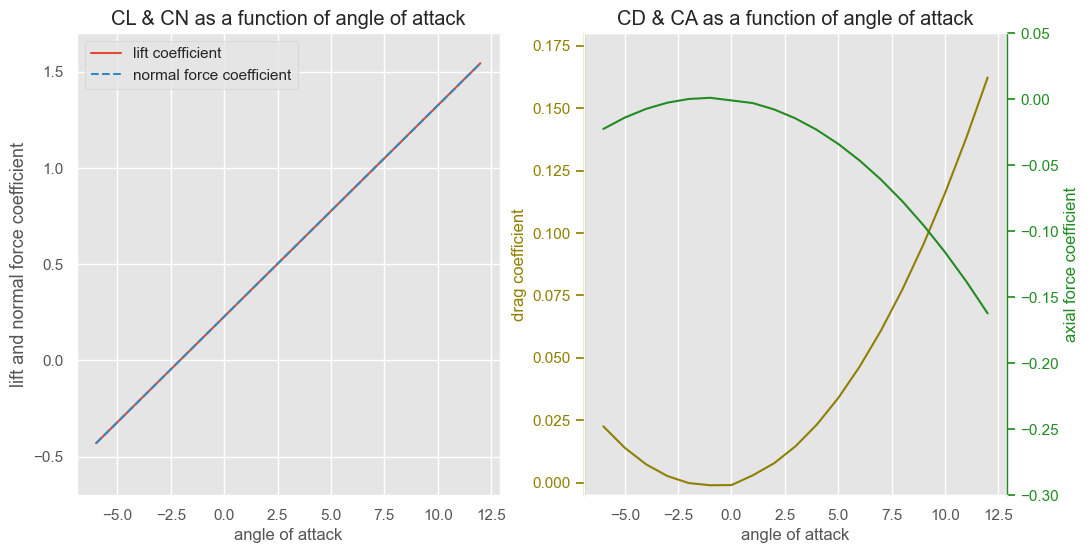

In [37]:
fig, (al, ad) = plt.subplots(1, 2, gridspec_kw={'wspace':0.2, 'hspace':0.2}, figsize=(12, 6), sharey=False)

# Biển diễn CL và CN
al.set_ylim(-0.7, 1.7)
al.set_ylabel('lift and normal force coefficient', fontdict={'size': 13})
naca.plot(x='deg', y='CL', kind='line', ax=al, label='lift coefficient')
naca.plot(x='deg', y='CN', kind='line', ax=al, label='normal force coefficient', style='--')
al.set_xlabel('angle of attack')
al.set_title('CL & CN as a function of angle of attack')

# Biểu diễn CD và CA
aa = ad.twinx()
naca.plot(x='deg', y='CD', kind='line', ax=ad, color='#8F8000', ylim=(-0.005, 0.18), grid=False, legend=False)
naca.plot(x='deg', y='CA', kind='line', ax=aa, color='#228B22', ylim=(-0.3, 0.05), grid=False, legend=False)
ad.grid(True, axis='x')
ad.set_ylabel('drag coefficient', color='#8F8000')
aa.set_ylabel('axial force coefficient', color='#228B22')
ad.set_xlabel('angle of attack')
ad.spines['left'].set_color('#8F8000')
aa.spines['right'].set_color('#228B22')
ad.tick_params(axis="y", colors="#8F8000")
aa.tick_params(axis="y", colors="#228B22")
ad.set_title('CD & CA as a function of angle of attack')

,deg,Xcp,Xac
0,-6,0.126515,0.25
1,-5,0.084269,0.25
2,-4,-0.001913,0.25
3,-3,-0.274833,0.25
4,-2,6.543662,0.25
5,-1,0.699813,0.25
6,0,0.483241,0.25
7,1,0.407439,0.25
8,2,0.368822,0.25
9,3,0.345418,0.25


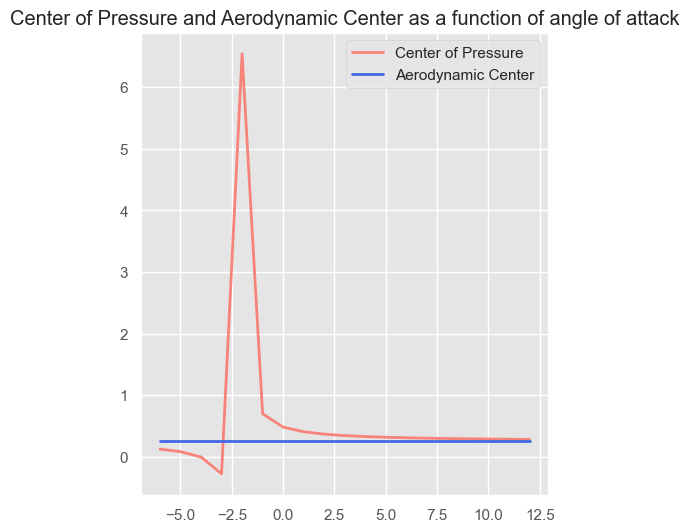

In [40]:
center2 = pd.DataFrame()
center2['deg'] = naca['deg']    # Cột góc tấn
center2['Xcp'] = 0.25 - (CM25) / (naca['CN'])    # Tâm áp suất
center2['Xac'] = 0.25     # Tâm khí động theo thin airfoil theory

display(center2)    # Hiển thị bảng số liệu

fig, ax = plt.subplots(figsize=(12, 6), sharey=True)
ax.plot('deg', 'Xcp', data=center2, color='#F88379', label='Center of Pressure', linewidth=2)    # Đường tâm áp suất
ax.plot('deg', 'Xac', data=center2, color='#4169E1', label='Aerodynamic Center', linewidth=2)    # Đường tâm khí động
ax.set(title='Center of Pressure and Aerodynamic Center as a function of angle of attack', aspect=3)    # Điều chỉnh đồ thị
ax.legend()